# **Trip Advisor hotel reviews**
## EXPLORATORY DATA ANALYSIS
***
***

In [38]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# set no limit to raw display with pandas
pd.set_option('display.max_rows', None)

# define working paths
PROJECT_PATH = os.getcwd()
RAWDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'raw')
IMAGES_PATH = os.path.join(PROJECT_PATH, os.pardir, 'images')



In [19]:
# read raw data
file_1 = os.path.join(RAWDATA_PATH, "base tripadvisor hotel.csv")
df_raw_data = pd.read_csv(file_1,  sep=",  ,", engine='python')

df_raw_data = df_raw_data.reset_index()
df_raw_data = df_raw_data.rename(columns={"index":"review", "Review,Rating":"rating"})

## General overview of the data set
***

In [20]:
# Checking the dtypes of all the columns
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  20491 non-null  object
 1   rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [21]:
# check head of data set
df_raw_data.head(5)

review  rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [22]:
# chek for quantity rows and columns of data set
df_raw_data_shape = df_raw_data.shape

print(f"This data set contains {df_raw_data_shape[0]} rows and {df_raw_data_shape[1]} columns.")

This data set contains 20491 rows and 2 columns.


In [23]:
# check for columns names
df_raw_data_shape_columns = list(df_raw_data.columns)

print(f"The data set contains the following columns: \n{df_raw_data_shape_columns}")

The data set contains the following columns: 
['review', 'rating']


In [24]:
# identify null values by percentage
missing_values = df_raw_data.isnull()
missing_values.sum() / len(df_raw_data)

review    0.0
rating    0.0
dtype: float64

In [25]:
# check for duplicate data 
df_raw_data.duplicated().sum()

0

In [26]:
# look describe data set
df_raw_data["rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: rating, dtype: float64

## Univariate analysis
***

In [34]:
# Length of word in sentence
df_raw_data['length'] = df_raw_data['review'].apply(len)
df_raw_data.head()

review  rating  length
0  nice hotel expensive parking got good deal sta...       4     590
1  ok nothing special charge diamond member hilto...       2    1686
2  nice rooms not 4* experience hotel monaco seat...       3    1424
3  unique, great stay, wonderful time hotel monac...       5     597
4  great stay great stay, went seahawk game aweso...       5    1278

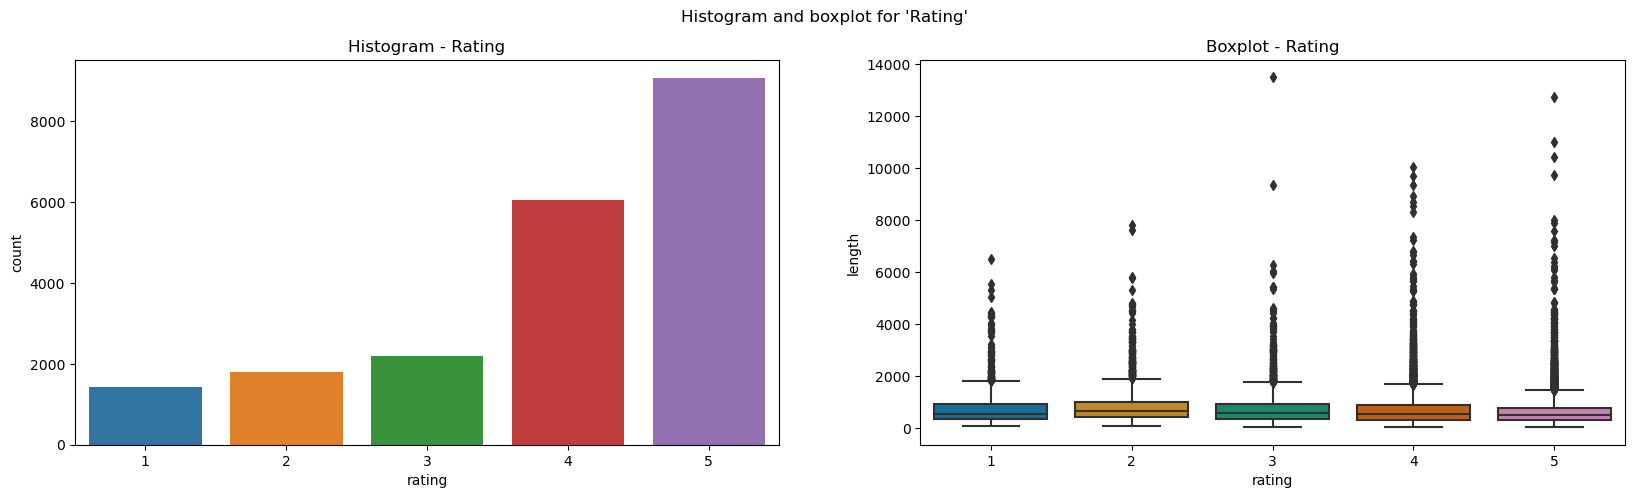

In [30]:
# bar plot and bloxplot
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Histogram and boxplot for \'Rating\'')
axes[0].set_title("Histogram - Rating")
axes[1].set_title("Boxplot - Rating")
sns.countplot(x='rating', data=df_raw_data, ax=axes[0])
sns.boxplot(x='rating',y='length',data=df_raw_data,palette=sns.color_palette('colorblind'),  ax=axes[1])
plt.savefig(os.path.join(IMAGES_PATH, f"bar_box_plot_rating.png"))

In [85]:
# Percentage rating
temp_a = df_raw_data["rating"].value_counts(normalize=True).reset_index().rename(columns={"index":"rating", "rating":"percentage"})
temp_b = df_raw_data["rating"].value_counts().reset_index().rename(columns={"index":"rating", "rating":"percentage"})
df_percentage = pd.merge(temp_a, temp_b, how="left", on="rating").rename(columns={"percentage_x":"percentage", "percentage_y":"value counts"})
df_percentage["cummulative"] = df_percentage["percentage"].cumsum()
df_percentage

rating  percentage  value counts  cummulative
0       5    0.441853          9054     0.441853
1       4    0.294715          6039     0.736567
2       3    0.106583          2184     0.843151
3       2    0.087502          1793     0.930652
4       1    0.069348          1421     1.000000

In [32]:
# Length of word in sentence
df_raw_data['length'] = df_raw_data['review'].apply(len)
df_raw_data.head()

review  rating  length
0  nice hotel expensive parking got good deal sta...       4     590
1  ok nothing special charge diamond member hilto...       2    1686
2  nice rooms not 4* experience hotel monaco seat...       3    1424
3  unique, great stay, wonderful time hotel monac...       5     597
4  great stay great stay, went seahawk game aweso...       5    1278

In [35]:
# look describe for length of sentence
df_raw_data["length"].describe().round(0)

count    20491.0
mean       722.0
std        689.0
min         41.0
25%        336.0
50%        534.0
75%        856.0
max      13498.0
Name: length, dtype: float64

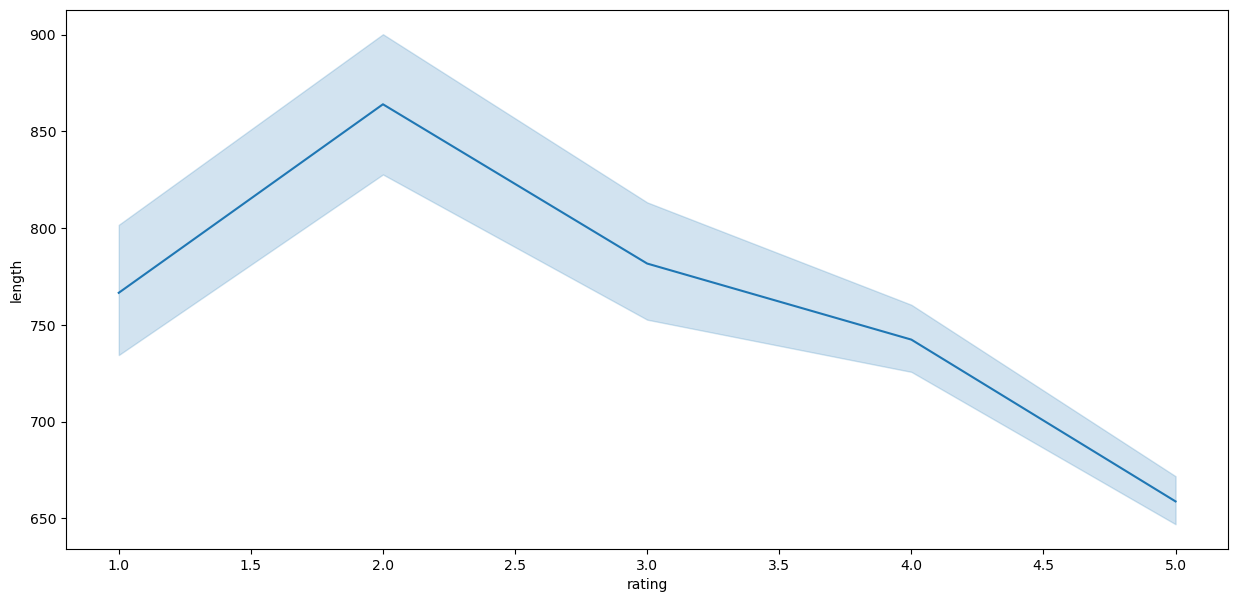

In [36]:
# check for relationship between rating and length
plt.figure(figsize=(15,7))
sns.lineplot(data=df_raw_data,x="rating", y="length")
plt.savefig(os.path.join(IMAGES_PATH, f"relationship_rating_lenght.png"))

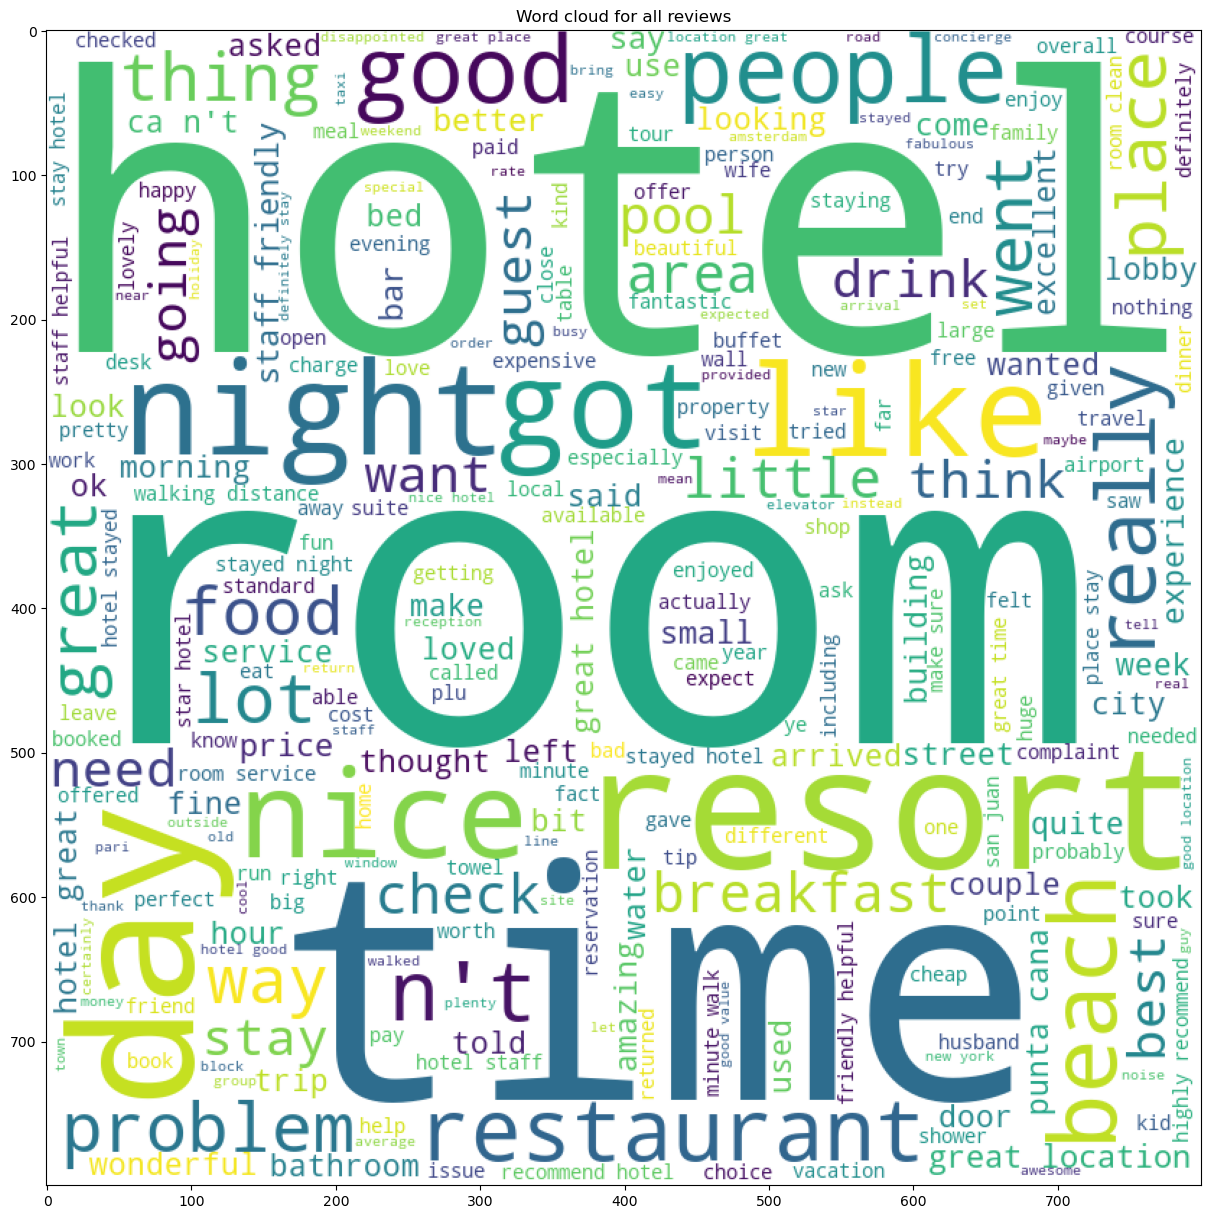

In [82]:
# word cloud for all reviews
stopwords_list = stopwords.words('english') 

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="white", stopwords=stopwords_list).generate(' '.join(df_raw_data['review']))
plt.title(f"Word cloud for all reviews")
plt.imshow(wc1)
plt.savefig(os.path.join(IMAGES_PATH, f"word_cloud_score_all_ratings.png"))

In [84]:
# count for the top ten most used words for all reviews
dict_freq = WordCloud().process_text(' '.join(df_raw_data['review']))
df_freq = pd.DataFrame(list(dict_freq.items())).rename(columns={0:"word", 1:"freq"}).sort_values(by=["freq"], ascending=False).head(20).reset_index(drop=True)

print("*"*20)
print(f"Most common words for rating for all reviews")
print(f"{df_freq}")
print("-"*20)
print("")

********************
Most common words for rating for all reviews
          word  freq
0        hotel  8447
1         room  8112
2         time  5522
3       resort  5487
4          day  5421
5        night  4285
6         nice  3836
7          got  3711
8       people  3671
9          n't  3581
10  restaurant  3567
11       beach  3547
12        good  3283
13      really  3252
14     problem  3132
15       place  3129
16         lot  3111
17        went  2934
18       thing  2916
19        food  2836
--------------------



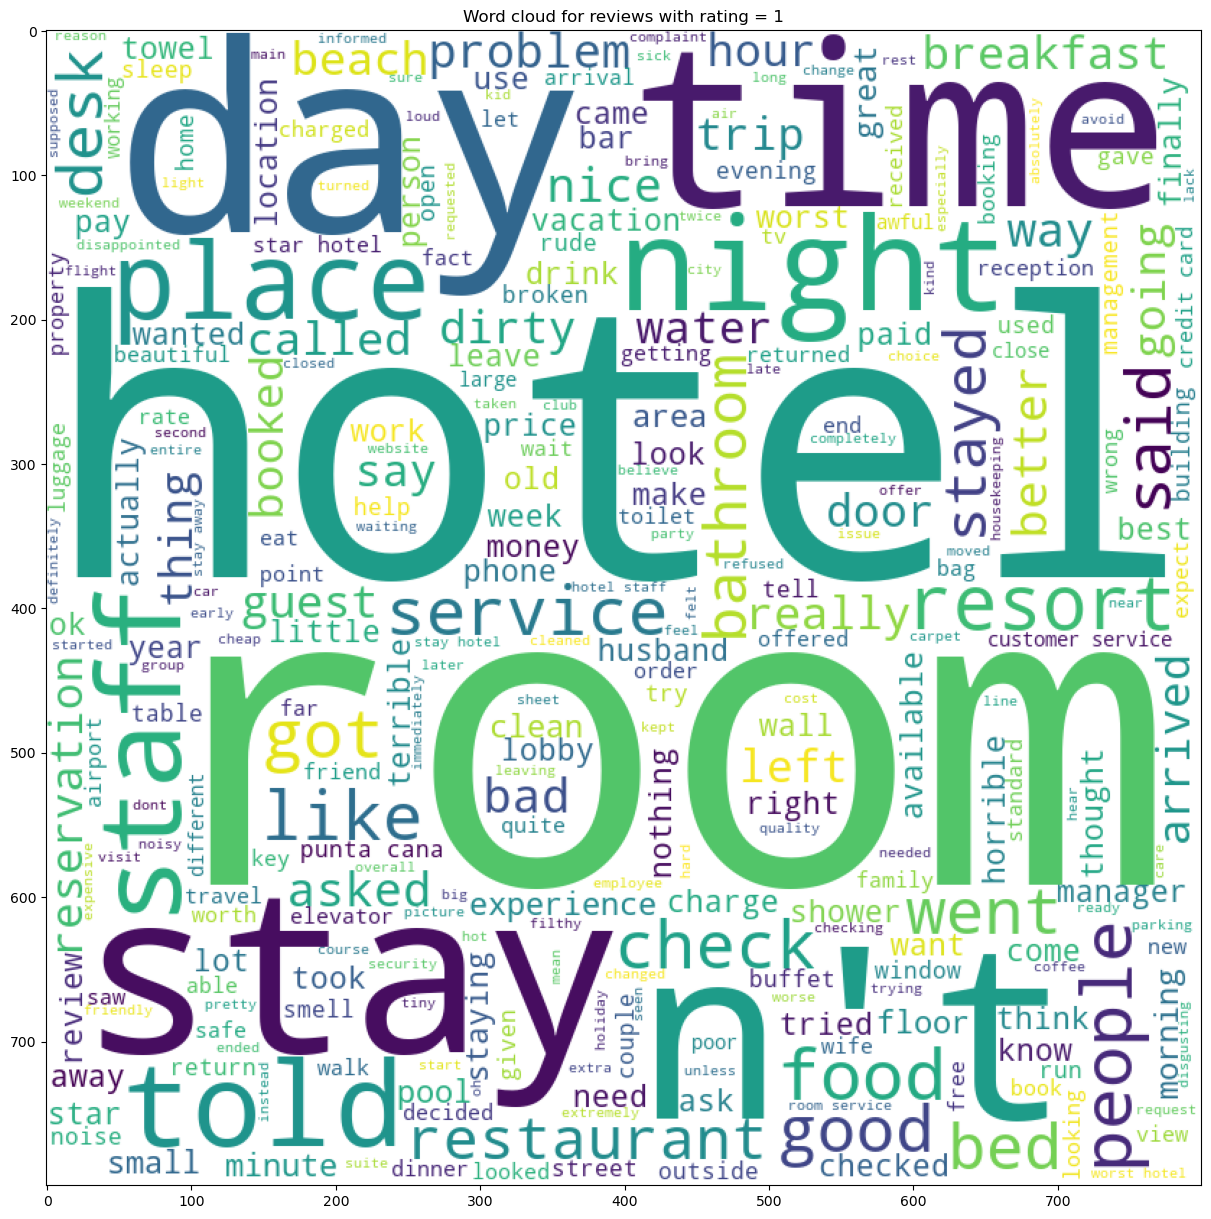

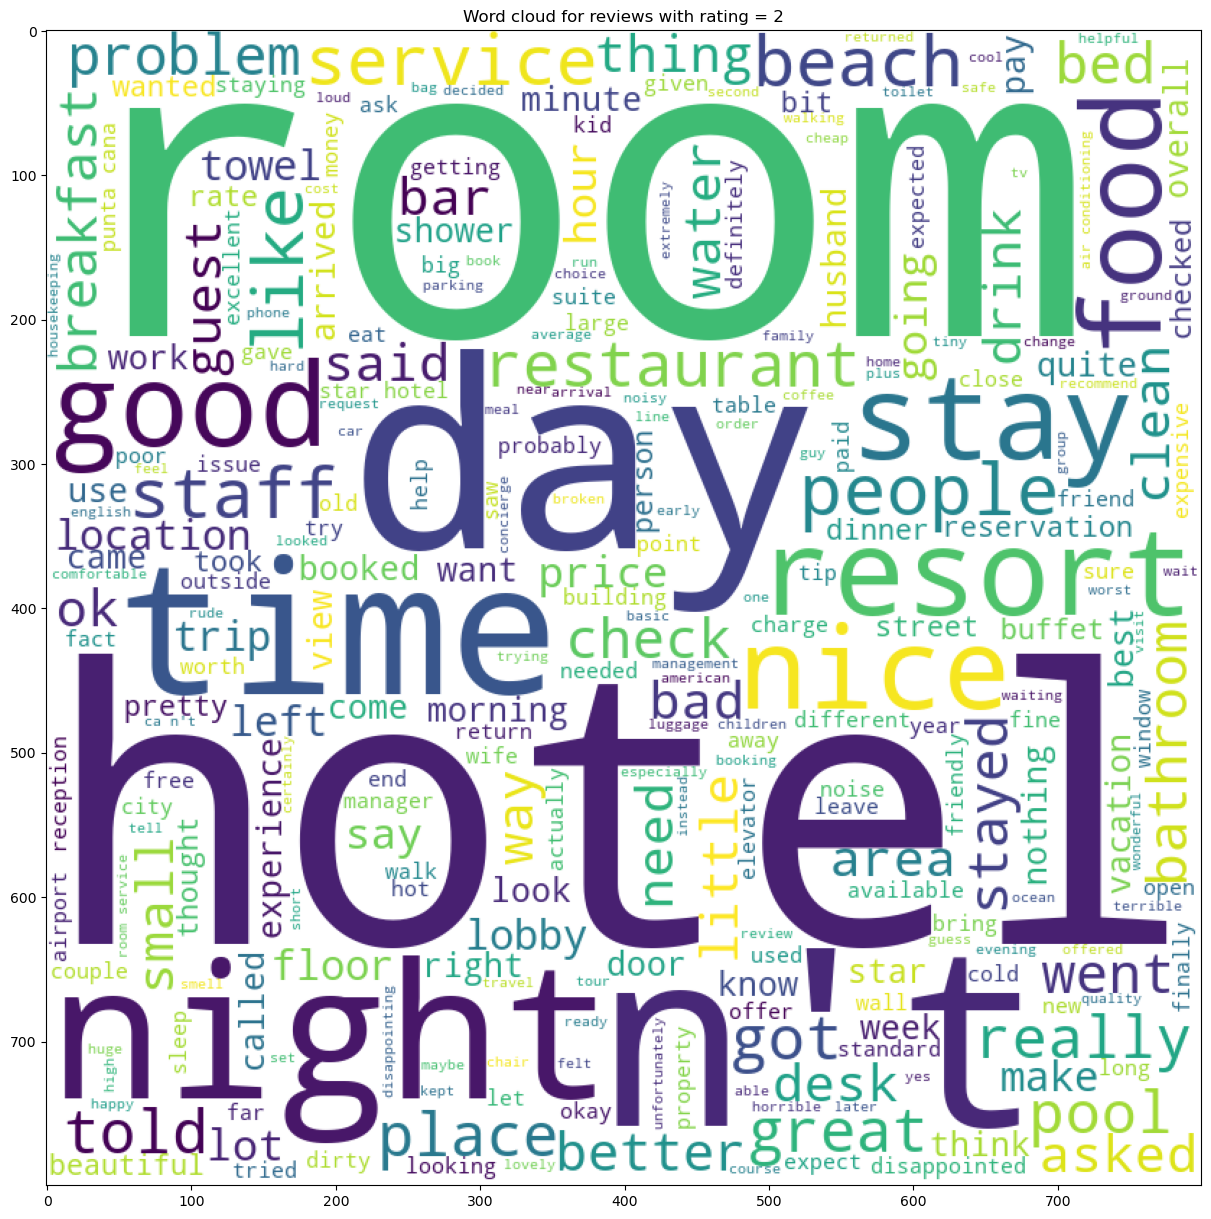

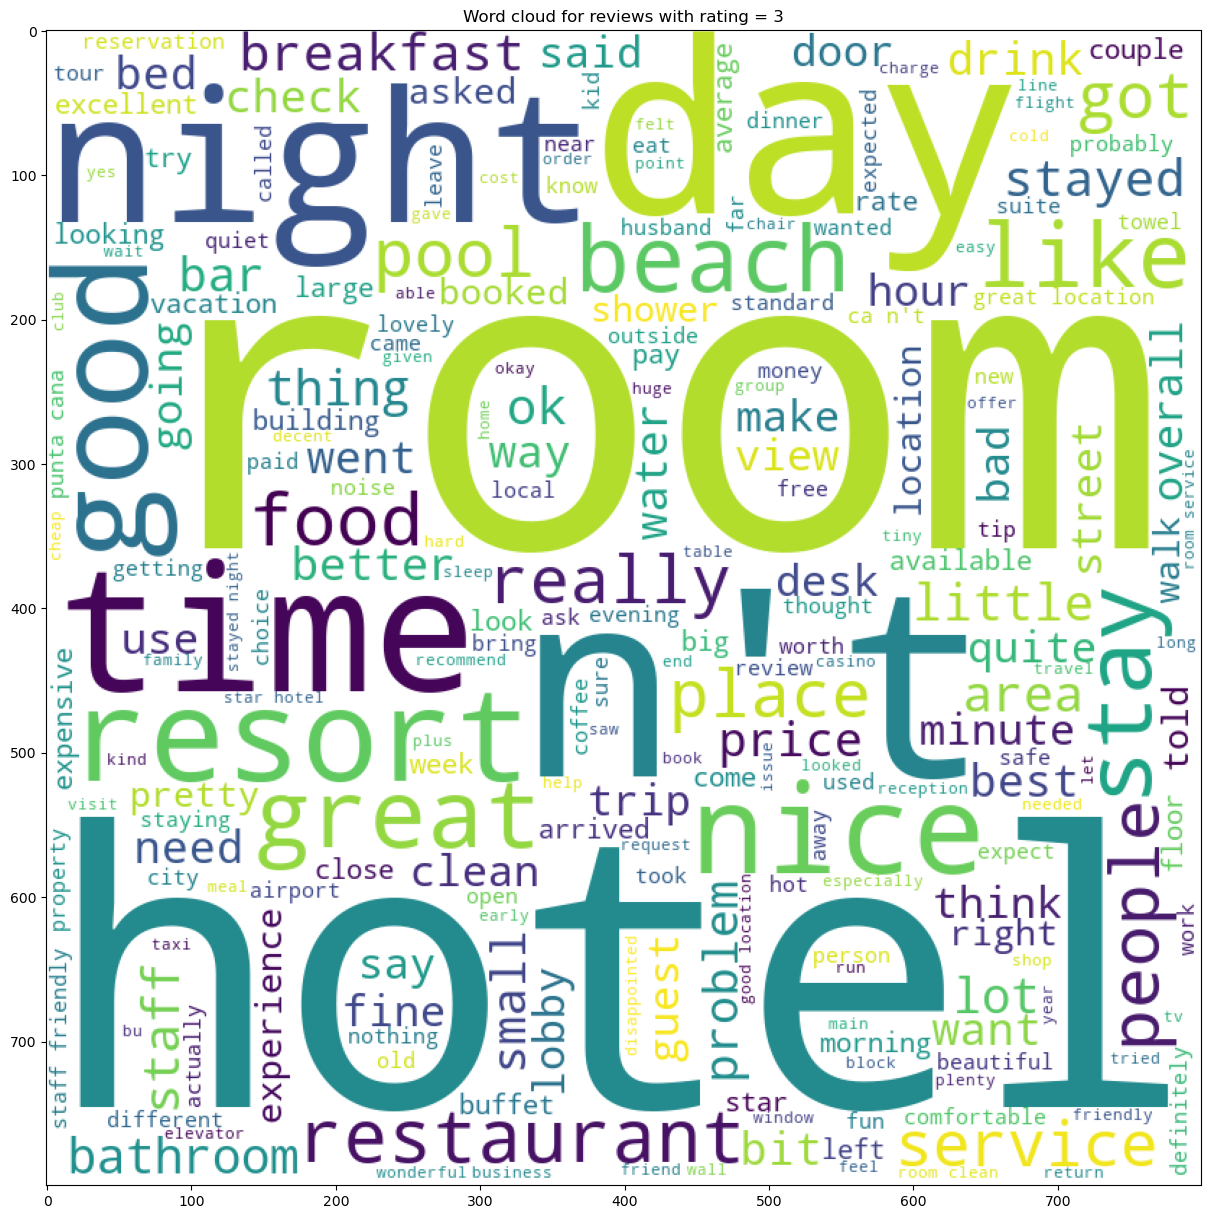

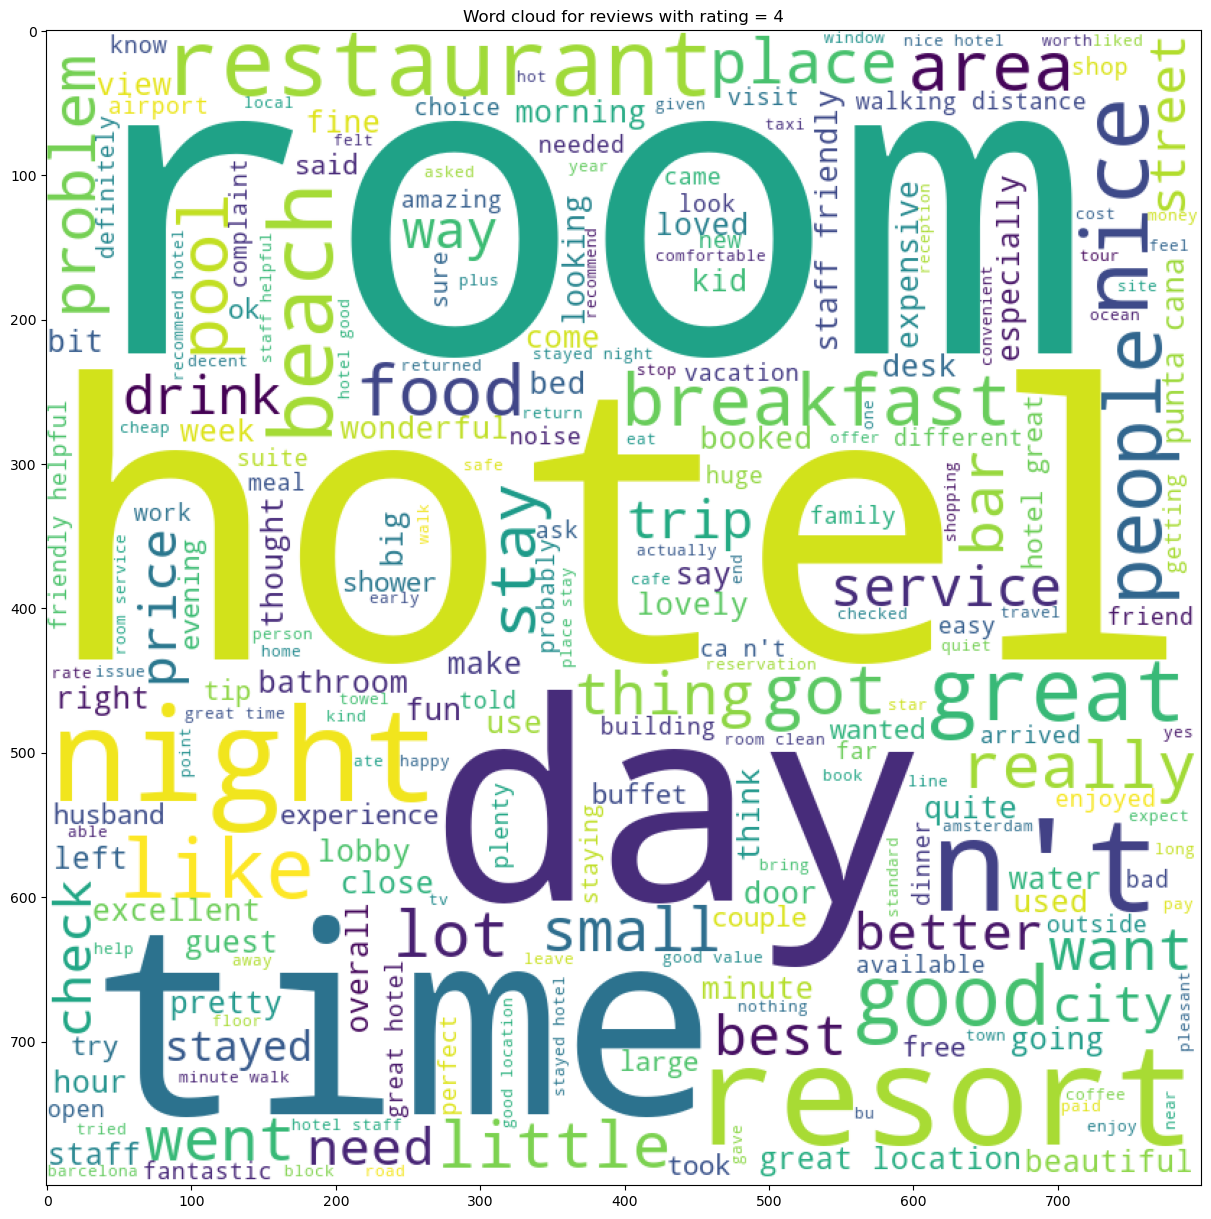

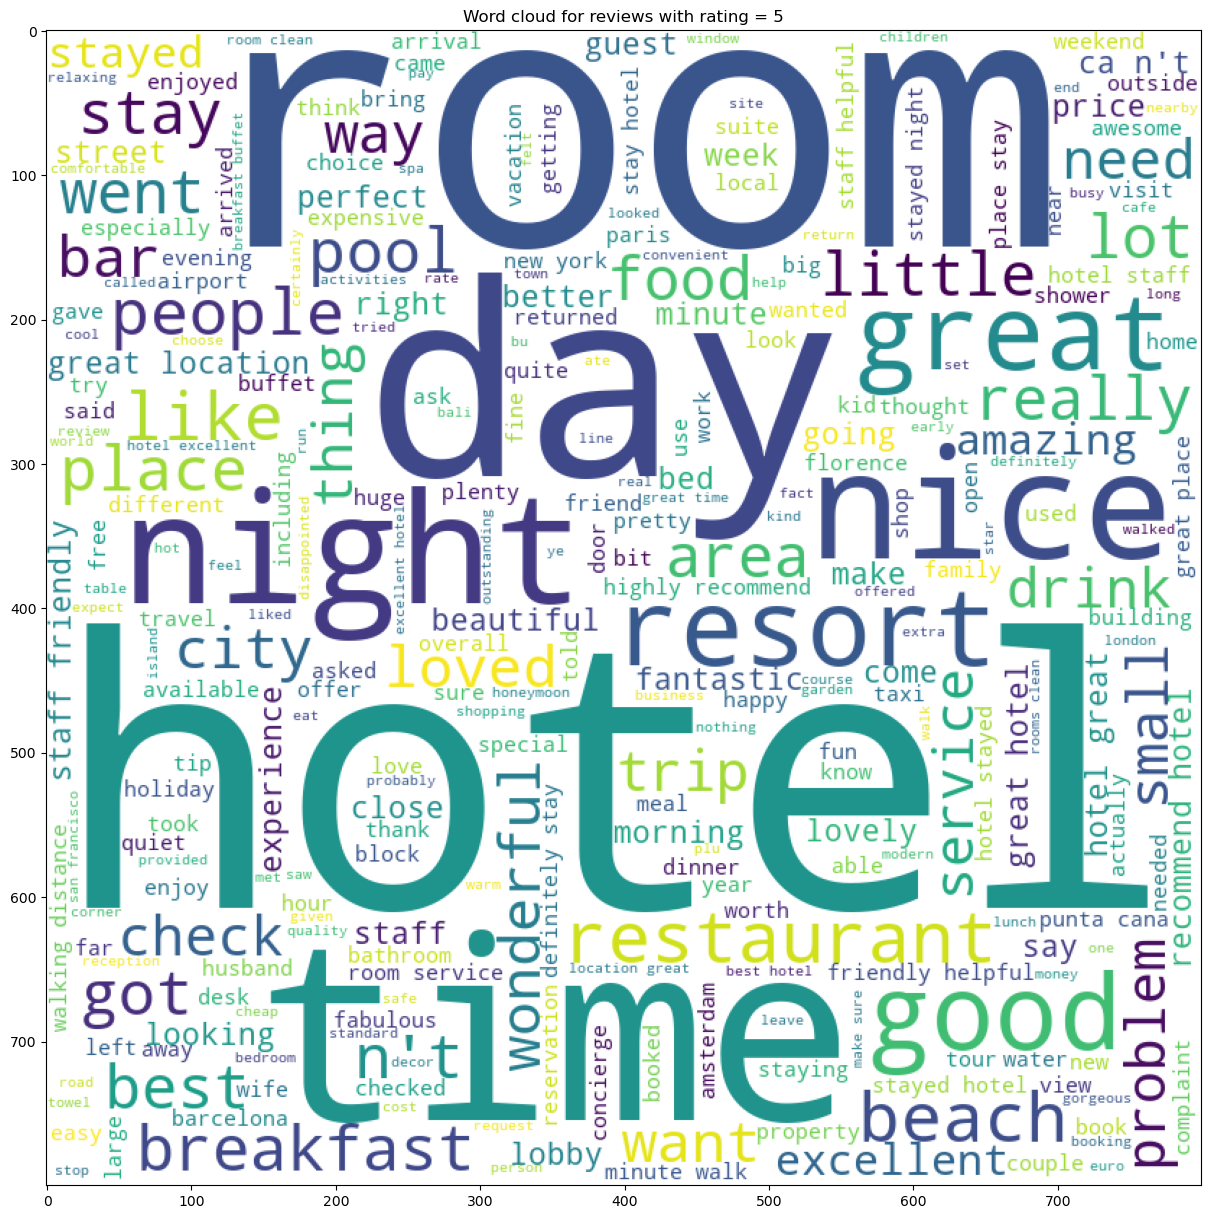

In [39]:
# word cloud for each rating score
for rating in range(1,6):
    df_raw_data_temp = df_raw_data[df_raw_data["rating"] == rating]
    plt.figure(figsize=(15,15))
    wc1 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="white", stopwords=stopwords_list).generate(' '.join(df_raw_data_temp['review']))
    plt.title(f"Word cloud for reviews with rating = {rating}")
    plt.imshow(wc1)
    plt.savefig(os.path.join(IMAGES_PATH, f"word_cloud_score_{rating}.png"))

In [80]:
# count for the top ten most used words for each score

for rating in range(1,6): 
    df_raw_data_temp = df_raw_data[df_raw_data["rating"] == rating]
    dict_freq = WordCloud().process_text(' '.join(df_raw_data_temp['review']))
    df_freq = pd.DataFrame(list(dict_freq.items())).rename(columns={0:"word", 1:"freq"}).sort_values(by=["freq"], ascending=False).head(10).reset_index(drop=True)

    print("*"*20)
    print(f"Most common words for rating = {rating}")
    print(f"{df_freq}")
    print("-"*20)
    print("")

********************
Most common words for rating = 1
    word  freq
0   room  3376
1  hotel  2886
2    day  1124
3    n't   944
4   stay   829
5   time   829
6  night   828
7   told   671
8  staff   630
9  place   625
--------------------

********************
Most common words for rating = 2
     word  freq
0    room  4000
1   hotel  3547
2     day  1331
3     n't  1281
4   night  1159
5    time  1127
6  resort   998
7    stay   956
8    good   911
9    nice   889
--------------------

********************
Most common words for rating = 3
     word  freq
0    room  3946
1   hotel  3801
2     n't  1459
3     day  1356
4   night  1260
5    time  1133
6  resort  1092
7    good  1090
8    nice  1070
9   great  1033
--------------------

********************
Most common words for rating = 4
         word  freq
0        room  6111
1       hotel  6040
2         day  2699
3        time  2412
4         n't  2261
5      resort  2237
6       night  2216
7  restaurant  2074
8        nice  2062
9

## EDA summary
***

- This data set contains 20491 rows and 2 columns.
- The data set has no null values.
- The data set has no duplicated values.
- Rating has the following statistics: 

        mean         3.95
        std          1.23
        min          1.00
        25%          3.00
        50%          4.00
        75%          5.00
        max          5.00
- Rating has the following occurence

        rating	        percentage	value counts    cummulative
                5	        0.441853	9054	        0.441853
                4	        0.294715	6039	        0.736567
                3	        0.106583	2184	        0.843151
                2	        0.087502	1793	        0.930652
                1	        0.069348	1421	        1.000000

Which shows that $73\%$ of the reviews has good rating scores. 

- Due last literal, is possible to conclude that target variable is imbalanced.

- The length words in review sentences has the following statistics:

        mean       722.0
        std        689.0
        min         41.0
        25%        336.0
        50%        534.0
        75%        856.0
        max      13498.0

- By checking the relationship between rating and length of sentences, is possible to conclude that there exists a negative correlation between lenght and rating. This is, given less words in a review better the rating. 

- In general, the top 20 of most used words in reviews are: 

        WORD    FREQUENCY
        ----    ---------
        hotel   8447
        room    8112
        time    5522
        resort  5487
        day     5421
        night   4285
        nice    3836
        got     3711
        people  3671
        n't     3581
        restaurant  3567
        beach   3547
        good    3283
        really  3252
        problem 3132
        place   3129
        lot     3111
        went    2934
        thing   2916
        food    2836